**Problem statement:** Predict whether the customer is exited from the organization or not.

In [1]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Load the data
data = pd.read_csv('/content/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Drop the columns which won't be helpful to make predictions
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace=True)

In [4]:
# Ceck for null values in the dataset
data.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
# Check for object datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
# Label Encode object datatypes
data_types_dict = dict(data.dtypes)

# Keep track mappings column name to LabelEncoders
Label_encoder_collection = {}
for col_name, data_type in data_types_dict.items():
  if data_type == 'object':
    Le = LabelEncoder()
    data[col_name] = Le.fit_transform(data[col_name])
    Label_encoder_collection[col_name] = Le

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [7]:
# Split the data into feature and target variables
X = data.iloc[:, :-1].values.astype(np.float32)   # Feature Variables
Y = data.iloc[: , -1].values.astype(int)          # Target Variable

In [8]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

**Build model without any improvement:**

In [9]:
# Create sequential object that will connect all the layers
model = tf.keras.models.Sequential()
# Add Input layer and specify the dimension, in this case number of columns i.e., 10
model.add(tf.keras.Input(shape = (10,)))
# Add 1st hidden layer
model.add(tf.keras.layers.Dense(32))
# Add 2nd hidden layer
model.add(tf.keras.layers.Dense(32))
# Add Output layer with activation function as Sigmoid as it is a binary classification problem and will use only one neuron to predict
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

# Print model summary to understand neural network flow
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Create Optimizer and compile the model
Optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(Optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [11]:
# Train the model
history =  model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 20)

Epoch 1/20
250/250 [==============================] - 1s 2ms/step - loss: 717.1056 - accuracy: 0.6609 - val_loss: 186.0246 - val_accuracy: 0.8020
Epoch 2/20
250/250 [==============================] - 0s 1ms/step - loss: 293.5448 - accuracy: 0.6653 - val_loss: 331.7857 - val_accuracy: 0.8020
Epoch 3/20
250/250 [==============================] - 0s 2ms/step - loss: 276.0815 - accuracy: 0.6729 - val_loss: 292.1165 - val_accuracy: 0.2640
Epoch 4/20
250/250 [==============================] - 0s 2ms/step - loss: 233.9246 - accuracy: 0.6725 - val_loss: 282.2797 - val_accuracy: 0.8020
Epoch 5/20
250/250 [==============================] - 1s 2ms/step - loss: 272.9891 - accuracy: 0.6754 - val_loss: 378.8786 - val_accuracy: 0.4515
Epoch 6/20
250/250 [==============================] - 1s 3ms/step - loss: 242.2568 - accuracy: 0.6825 - val_loss: 77.1142 - val_accuracy: 0.8015
Epoch 7/20
250/250 [==============================] - 1s 3ms/step - loss: 229.5750 - accuracy: 0.6730 - val_loss: 85.0559 - v

The history variable declared here saves all the model metric performances while training.

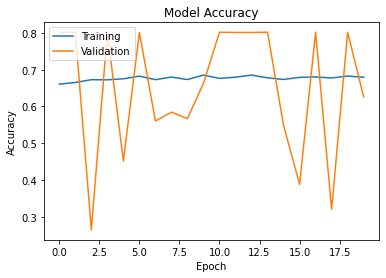

In [12]:
# Plot the performance [Accuracy] of the model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show() 

- Training accuracy is constant.
- Validation accuracy is highly fluctuating.

**NOTE**

A well-trained model would have training and validation accuracy going gradually as the epochs progress. 

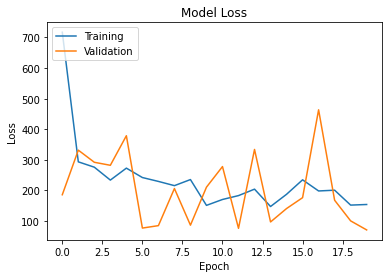

In [13]:
# Plot the Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

Training and validation loss are decreasing gradually.

In [14]:
# Make predictions
predictions = np.round(model.predict(X_test))

In [15]:
# Check accuracy
accuracy_score(Y_test, predictions)

0.626

In [16]:
# Confusion Matrix 
confusion_matrix(Y_test, predictions)

array([[1159,  445],
       [ 303,   93]])

- Actual 0 predicted 0 = 1159 (Correct Prediction of class 0)
- Actual 0 predicted 1 = 445 (False Prediction of class 0)
- Actual 1 predicted 0 = 303 (False Prediction of class 1)
- Actual 1 predicted 1 = 93 (Correct Prediction of class 1)

### Improve the model by using Dropout and Batch Normalization

- To handle imbalanced data, apply class weights (give higher weight to less frequent classes, so that the model gets highly penalized when it makes mistakes in predicting less frequent classes).
- Increase the complexity of the model by adding more layers and more neurons per layers.
- Add batch normalization layer in front of dense layers, this ensures there is a well normalized batch being processed by every layer.
- Add dropout after every layer, this would help individual neurons to learn more from gradients that are being back propagated.


NOTE: 

To calculate class weights, we have compute_class_weights function from sklearn utils. It takes in 3 parameters. class_weight must be balanced as we are trying to find weight that will balance the label classes, classes are the unique class values. y is  the labels data

compute_class_weights function will return a list of weights.

As tensorflow fit function takes class weights as dictionary, we will convert this list output into a dictionary.

**Build model with improvement:**

Enumerate() method adds a counter to an iterable and returns it in a form of enumerating object. This enumerated object can then be used directly for loops or converted into a list of tuples using the list() method.

In [17]:
# Add class weights when data is imbalanced
from sklearn.utils import compute_class_weight
class_weights = compute_class_weight(class_weight = 'balanced', classes = np.unique(Y_train), y = Y_train)

model_class_weights = {}
for e, weight in enumerate(class_weights):
  model_class_weights[e] = weight

In [18]:
# Final weights per class
model_class_weights

{0: 0.6290297216543481, 1: 2.437538086532602}

Higher weight for class 1 as it is the less frequent label.

In [19]:
# Add in Class Weights to handle imbalance
# Increase Units in Dense Layers and also increase number of layers
# Add Batch Normalization to layers
# Add dropout after Layers

# Sequential layer (to connect all the layers sequentially)
Model = tf.keras.models.Sequential()

# Input layer
Model.add(tf.keras.Input(shape=(10,)))

# Add Batch Normalization to 1st hidden layer
Model.add(tf.keras.layers.BatchNormalization())
Model.add(tf.keras.layers.Dense(128, activation = 'relu'))
Model.add(tf.keras.layers.Dropout(0.2))                     # Dropout layer of 1st hidden layer

# Add Batch Normalization to 2nd hidden layer
Model.add(tf.keras.layers.BatchNormalization())
Model.add(tf.keras.layers.Dense(64, activation = 'relu'))
Model.add(tf.keras.layers.Dropout(0.2))                     # Dropout layer of 2nd hidden layer

# Add Batch Normalization to 3rd hidden layer
Model.add(tf.keras.layers.BatchNormalization())
Model.add(tf.keras.layers.Dense(32, activation = 'relu'))

# Output layer
Model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

# Print model summary
Model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dense_3 (Dense)             (None, 128)               1408      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)               

The model has significantly high trainable parameters than the previous model, which has 1,441 trainable parameter.

In [20]:
# Optimize and compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
Model.compile(optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [21]:
# Train the model
History = Model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 20, class_weight = model_class_weights)

Epoch 1/20
250/250 [==============================] - 3s 6ms/step - loss: 0.6043 - accuracy: 0.6484 - val_loss: 0.4965 - val_accuracy: 0.7740
Epoch 2/20
250/250 [==============================] - 1s 5ms/step - loss: 0.5408 - accuracy: 0.7203 - val_loss: 0.4681 - val_accuracy: 0.7930
Epoch 3/20
250/250 [==============================] - 1s 5ms/step - loss: 0.5154 - accuracy: 0.7386 - val_loss: 0.4666 - val_accuracy: 0.7720
Epoch 4/20
250/250 [==============================] - 1s 3ms/step - loss: 0.5169 - accuracy: 0.7366 - val_loss: 0.4678 - val_accuracy: 0.7665
Epoch 5/20
250/250 [==============================] - 1s 2ms/step - loss: 0.5030 - accuracy: 0.7495 - val_loss: 0.4500 - val_accuracy: 0.7955
Epoch 6/20
250/250 [==============================] - 1s 2ms/step - loss: 0.5019 - accuracy: 0.7525 - val_loss: 0.4258 - val_accuracy: 0.8125
Epoch 7/20
250/250 [==============================] - 0s 2ms/step - loss: 0.4900 - accuracy: 0.7577 - val_loss: 0.4304 - val_accuracy: 0.8135
Epoch 

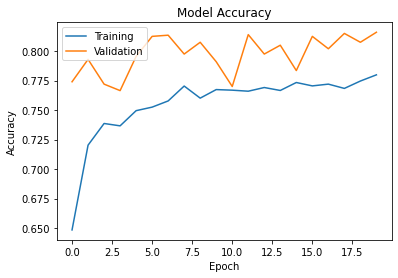

In [22]:
# Plot the performance [Accuracy] of the model
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show() 

Model's training and validation accuracy is increasing gradually.

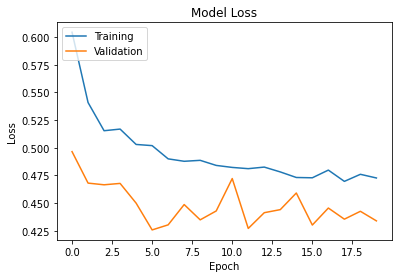

In [23]:
# Plot the Loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

Model's training and validation loss is decreasing gradually.

In [24]:
# Make predictions
Predictions = np.round(Model.predict(X_test))

In [25]:
# Check accuracy
accuracy_score(Y_test, Predictions)

0.816

The accuracy is better than the previous model.

In [26]:
# Confusion Matrix
confusion_matrix(Y_test, Predictions)

array([[1321,  283],
       [  85,  311]])

The model is predicting class 1 better than the previous model.